# Bank Marketing Dataset Anaysis

#### Author: Geovanny Tabango


### Part A. Exploratory Data Analysis

In [3]:
# Libraries used for data analyis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [ ]:
# Set a ramdom seed for reproducibility
# The random seed method hold and arbitrary number
np.random.seed(92)


# Phase 1. Of the Data Analytics Life Cycle is presented in the report of Task 1, where the problem domain is defined.

# Phase 2. Data Preparation.

In [6]:
# Load the dataset in to a pandas dataframe.
# By exploring the dataset we can see that the data is a CSV file with a delimiter of semi-colon ';'.
df = pd.read_csv('..\\data\\raw\\bank-additional-full.csv', sep=';')

#### Display the basic information of the dataset.
#### By the description of the dataset there are 0 missing values.

In [19]:
#check for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [16]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [30]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.skew()

TypeError: could not convert string to float: 'housemaid'

#### Analysis of the target distribution 

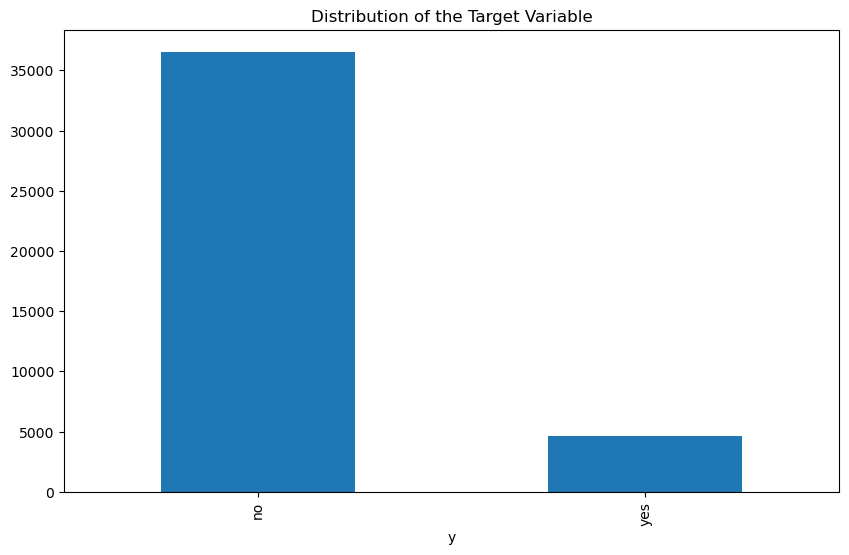

In [21]:
plt.figure(figsize=(10, 6))
df['y'].value_counts().plot(kind='bar')
plt.title('Distribution of the Target Variable')
plt.savefig('..\\reports\\figures\\target_variable_distribution.png')
plt.show() # execute plt.show() before close() to display the plot in the notebook
plt.close()


#### Categorical data

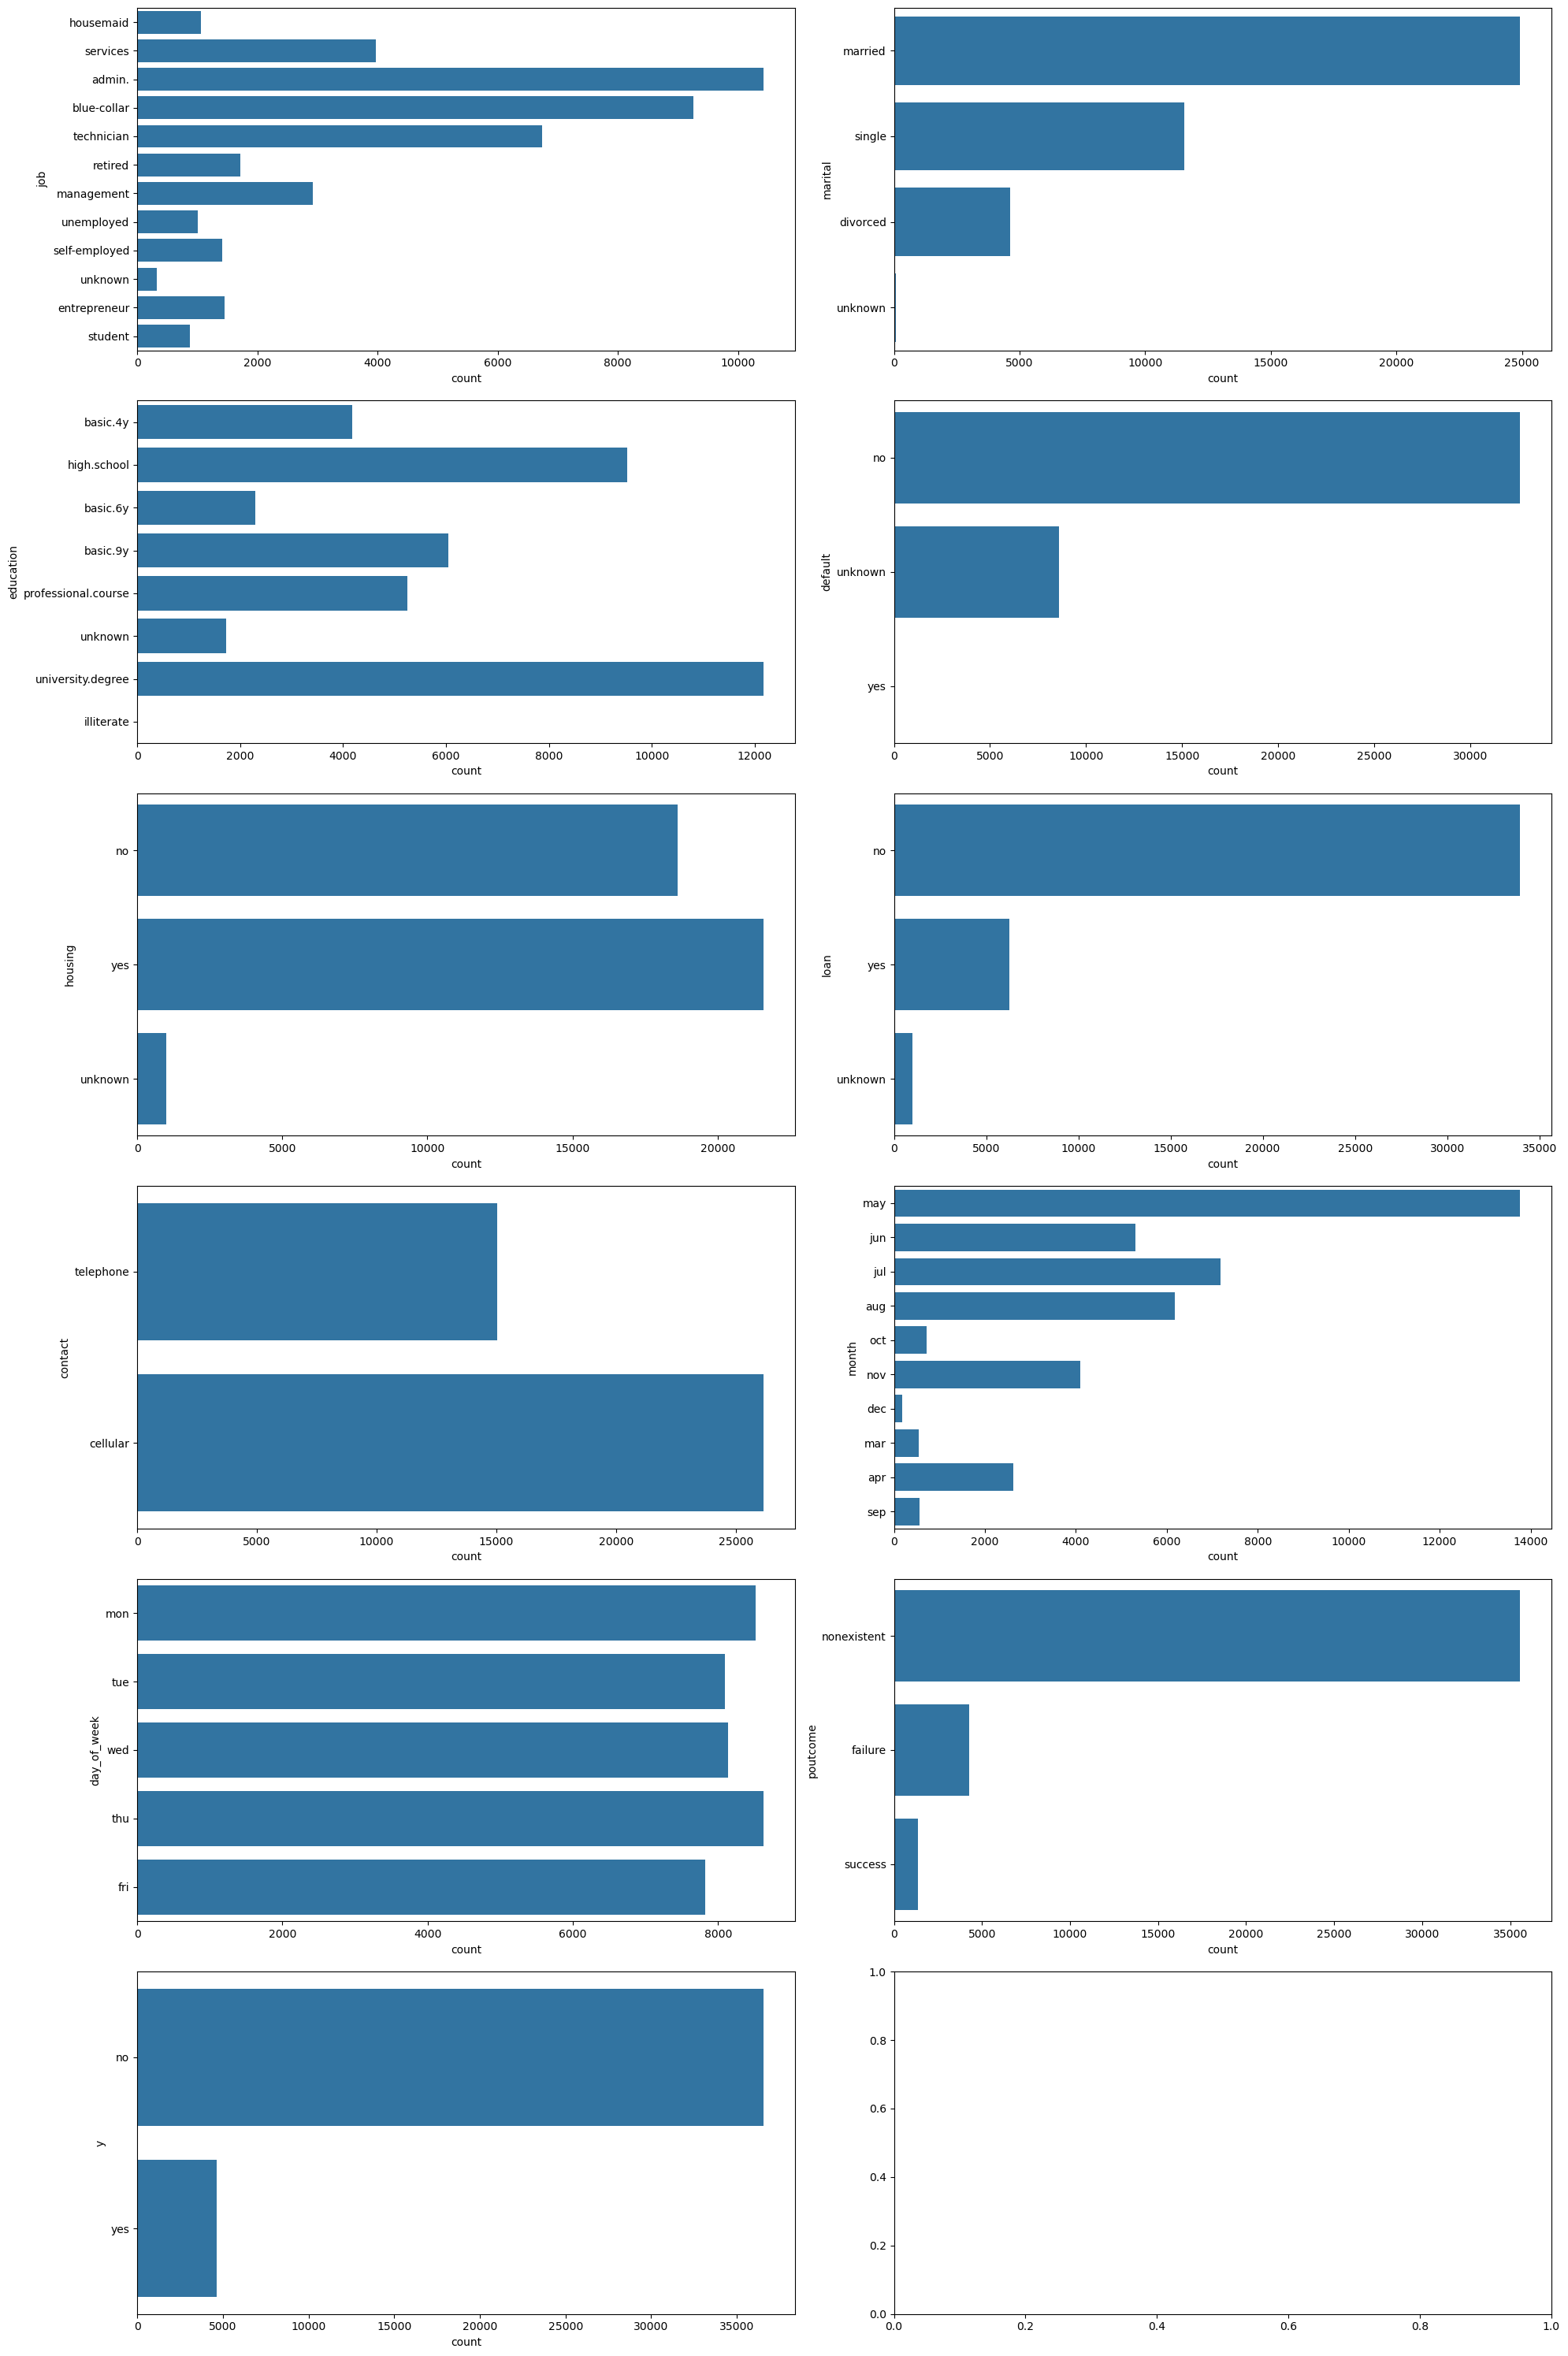

In [27]:
categorical_features = df.select_dtypes(include='object').columns
num_features = len(categorical_features)
num_rows = (num_features + 1) // 2  # Calculate required rows
fig, ax = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))

for i, feature in enumerate(categorical_features):
    sns.countplot(y=feature, data=df, ax=ax[i//2, i%2])

plt.tight_layout()
plt.savefig('..\\reports\\figures\\categorical_features_distribution.png')
plt.show()
plt.close()

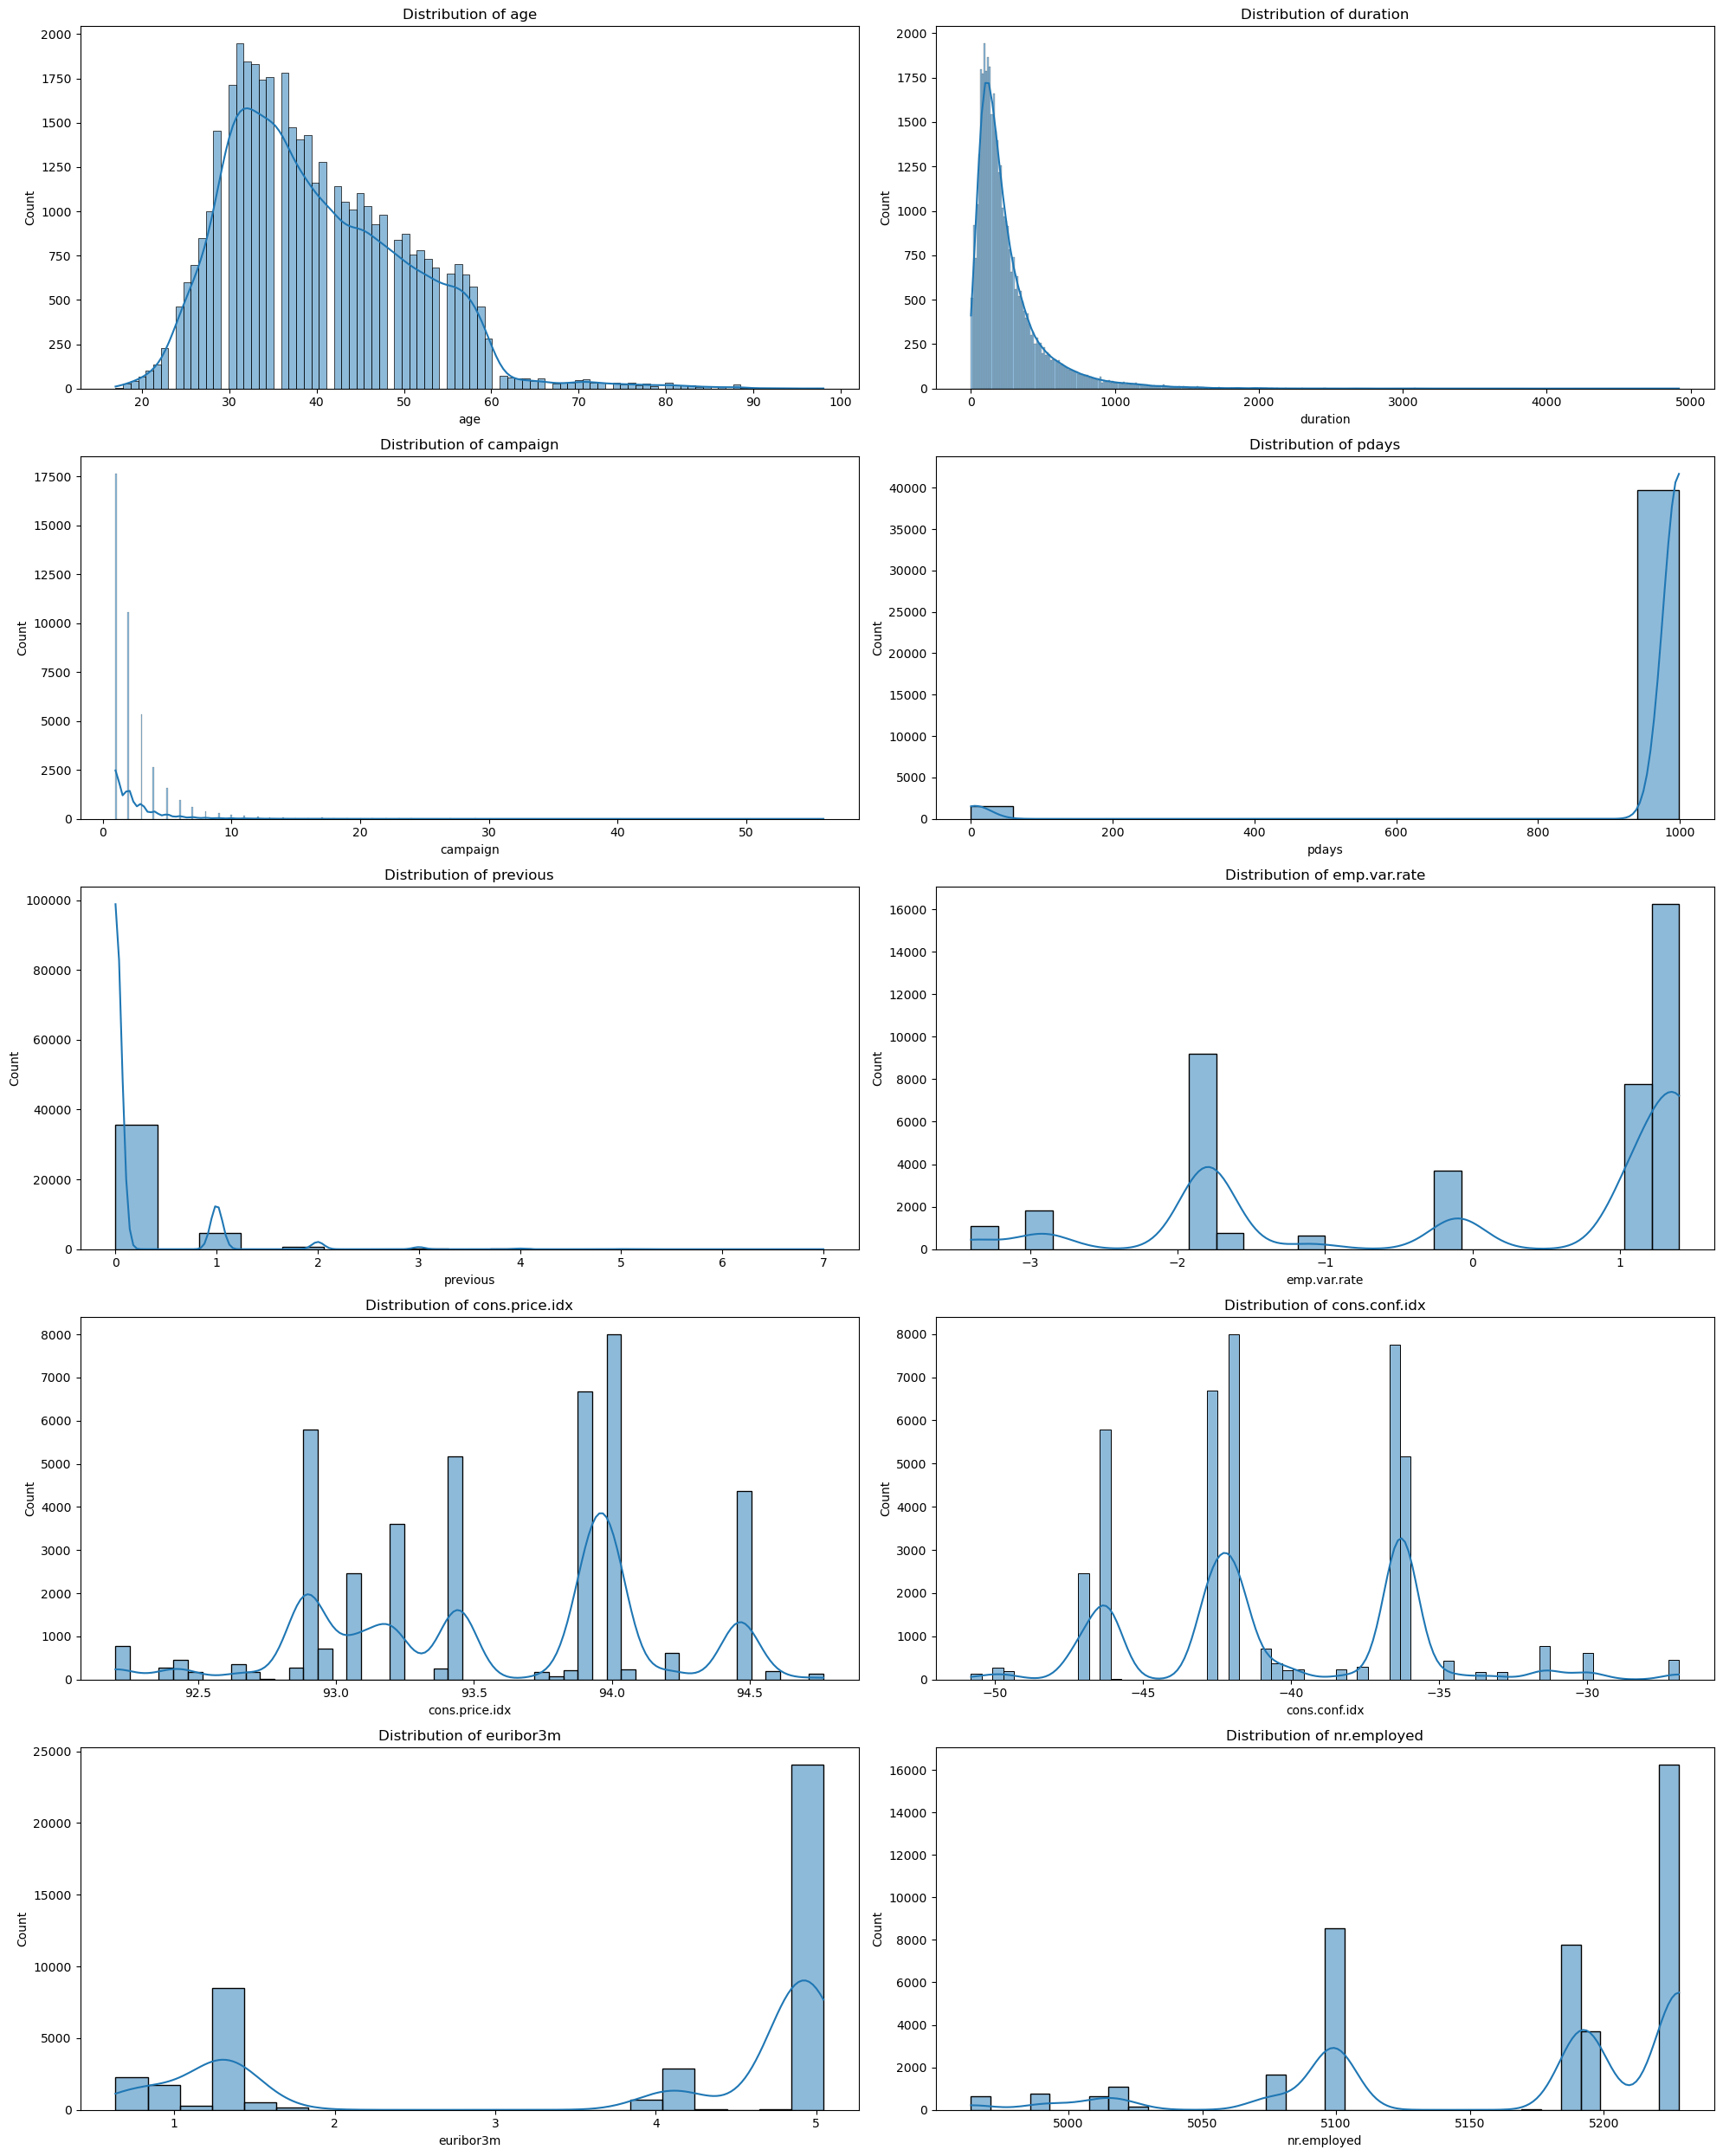

In [28]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
num_features = len(numerical_features)
num_rows = (num_features + 1) // 2  # Calculate required rows
fig, ax = plt.subplots(num_rows, 2, figsize=(20, num_rows * 5))

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.savefig('..\\reports\\figures\\numerical_features_distribution.png')
plt.show()
plt.close()

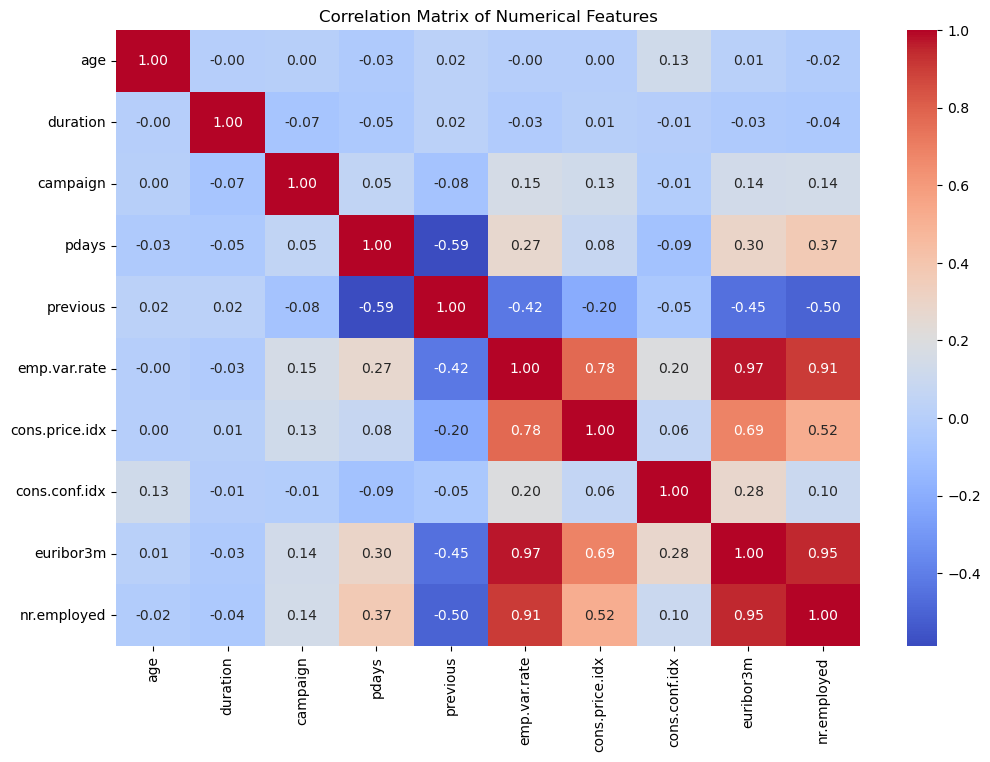

In [29]:
# Compute the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('..\\reports\\figures\\correlation_matrix.png')
plt.show()
plt.close()